# ML - Task3 - Data Preprocessing
### Objective:
 The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.
### Dataset:                                                                                                                                                
Dataset for Data preprocessing
Key Components to be fulfilled:
### Data Exploration:   
Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.
### Data Cleaning: 
Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
### Data Analysis:
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually
### Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.
### Feature Scaling: 
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

## IMPORT LIBRARIES

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv("Employee.csv") 
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


columns country and gender has no null value, rest columns has null values

In [9]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


There is a small difference between mean and median so we can come to a conclusion that we have less outliers 

In [10]:
df.shape

(148, 6)

In [6]:
df.duplicated().sum()

4

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
print("Unique values of each columns are given below -")
print("\nCompany:\n", df.Company.unique())
print("\n Length of company:" ,len(df.Company.unique()))
print("\nAge:\n", df.Age.unique())
print("\n Length of Age:" ,len(df.Age.unique()))
print("\nSalary:\n", df.Salary.unique())
print("\n Length of Salary:" ,len(df.Salary.unique()))
print("\nGender:\n", df.Gender.unique())
print("\n Length of Gender:" ,len(df.Gender.unique()))
print("\nPlace:\n", df.Place.unique()) 
print("\n Length of Place :" ,len(df.Place.unique()))
print("\nCountry:\n", df.Country.unique())
print("\n Length of Country:" ,len(df.Country.unique()))

Unique values of each columns are given below -

Company:
 ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

 Length of company: 7

Age:
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

 Length of Age: 30

Salary:
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

 Length of Salary: 41

Gender:
 [0 1]

 Length of Gender: 2

Place:
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

 Length of Place : 12

Country:
 ['India']

 Length of Country: 1


In [9]:
df.replace('Podicherry','Pondicherry',inplace=True)

In [9]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [10]:
df['Age'].replace(0, pd.NA, inplace=True)

In [11]:
df.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [12]:
df.drop(columns=['Country'], inplace=True)

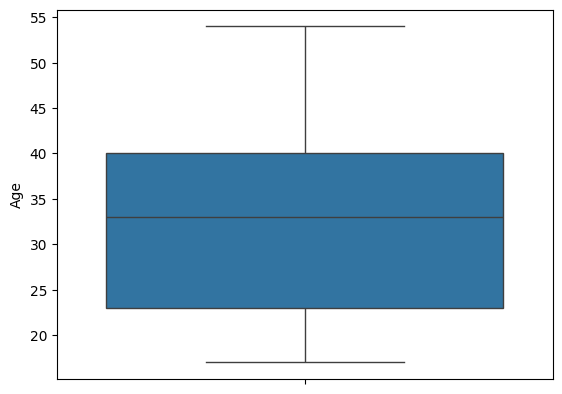

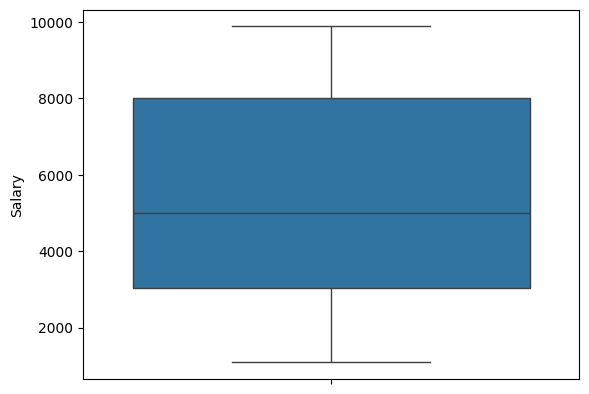

In [13]:
sns.boxplot(df.Age)
plt.show()

sns.boxplot(df.Salary) 
plt.show()

From the box plot it is evident that there is no outliers in the numerical columns. We can use mean values to fill the null values in numerical columns.

In [14]:
df['Gender'].replace({0: 'M', 1: 'F'}, inplace=True)

In [15]:
df.Company.fillna(df.Company.mode()[0], inplace = True)
df.Salary.fillna(df.Salary.mean().round(2), inplace = True)
df.Place.fillna(df.Place.mode()[0], inplace = True)
df.Age.fillna(df.Age.mean().round(2), inplace = True) 
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

None of the columns have null values in them 

In [16]:
print("Unique values of each columns are given below -")
print("\nCompany:\n", df.Company.unique())
print("\n Length of company:" ,len(df.Company.unique()))
print("\nAge:\n", df.Age.unique())
print("\n Length of Age:" ,len(df.Age.unique()))
print("\nSalary:\n", df.Salary.unique())
print("\n Length of Salary:" ,len(df.Salary.unique()))
print("\nGender:\n", df.Gender.unique())
print("\n Length of Gender:" ,len(df.Gender.unique()))
print("\nPlace:\n", df.Place.unique()) 
print("\n Length of Place :" ,len(df.Place.unique()))

Unique values of each columns are given below -

Company:
 ['TCS' 'Infosys' 'CTS' 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

 Length of company: 6

Age:
 [20.   30.   35.   40.   23.   32.04 34.   45.   18.   22.   32.   37.
 50.   21.   46.   36.   26.   41.   24.   25.   43.   19.   38.   51.
 31.   44.   33.   17.   54.  ]

 Length of Age: 29

Salary:
 [5283.47 2300.   3000.   4000.   5000.   6000.   7000.   8000.   9000.
 1089.   1234.   3030.   3045.   3184.   4824.   5835.   7084.   8943.
 8345.   9284.   9876.   2034.   7654.   2934.   4034.   5034.   8202.
 9024.   4345.   6544.   6543.   3234.   4324.   5435.   5555.   8787.
 3454.   5654.   5009.   5098.   3033.  ]

 Length of Salary: 41

Gender:
 ['M' 'F']

 Length of Gender: 2

Place:
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Pondicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

 Length of Place : 11


## Data Analysis

In [17]:
df1 = df[(df["Age"] > 40) & (df["Salary"] < 5000)] 
df1

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,M
32,Infosys,45.0,4034.0,Calcutta,M
39,Infosys,41.0,3000.0,Mumbai,M
50,Infosys,41.0,3000.0,Chennai,M
57,Infosys,51.0,3184.0,Hyderabad,M
68,Infosys,43.0,4034.0,Mumbai,M
75,Infosys,44.0,3000.0,Cochin,M
86,Infosys,41.0,3000.0,Delhi,M
93,Infosys,54.0,3184.0,Mumbai,M
104,Infosys,44.0,4034.0,Delhi,M


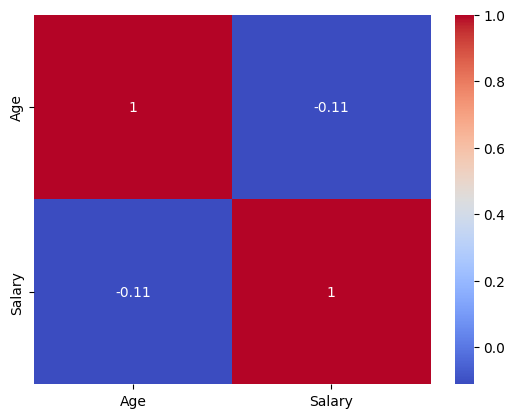

In [30]:
plot_df = df1.drop(['Company', 'Gender', 'Place'], axis='columns')
corr = plot_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

There is no linear correlation between age and salary

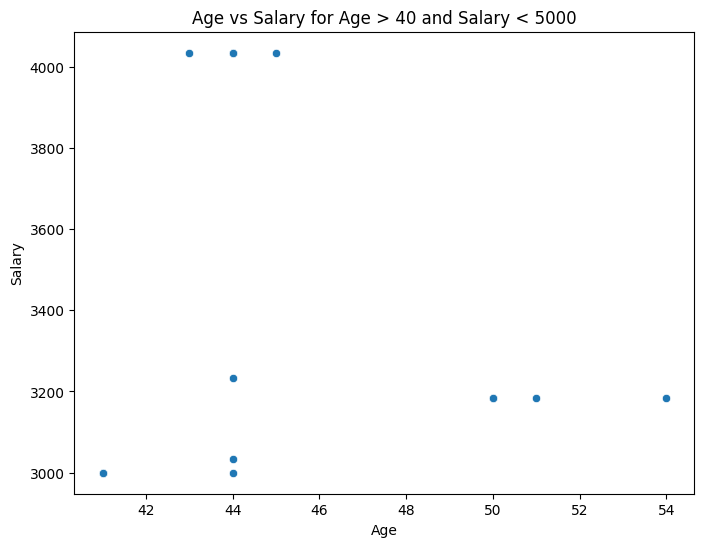

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df1)
plt.title('Age vs Salary for Age > 40 and Salary < 5000')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

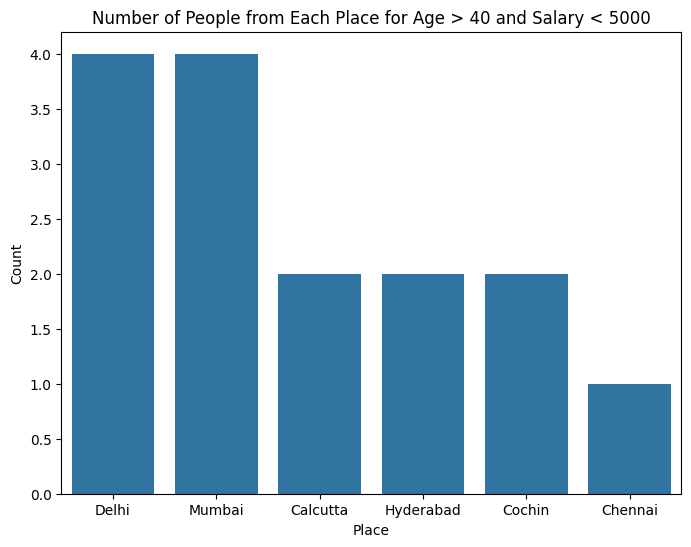

In [19]:
place_counts = df1['Place'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title('Number of People from Each Place for Age > 40 and Salary < 5000')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [20]:
df1['Place'].value_counts()

Place
Delhi        4
Mumbai       4
Calcutta     2
Hyderabad    2
Cochin       2
Chennai      1
Name: count, dtype: int64

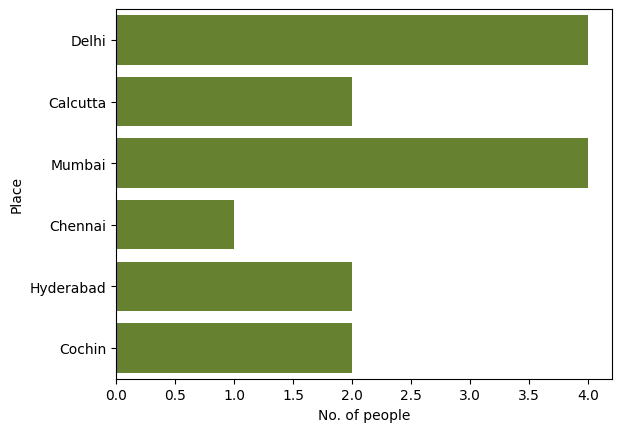

In [21]:
sns.countplot(df1.Place, color = 'olivedrab')
plt.xlabel("No. of people") 
plt.show()

## Data Encoding

In [22]:
df2=df.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder() 
for i in df2.select_dtypes(include = ["object"]): 
    df2[i] = label_encoder.fit_transform(df2[i])
print(df2)

     Company   Age   Salary  Place  Gender
0          4  20.0  5283.47      2       1
1          2  30.0  5283.47      6       1
2          4  35.0  2300.00      1       1
3          2  40.0  3000.00      4       1
4          4  23.0  4000.00      6       1
..       ...   ...      ...    ...     ...
142        3  22.0  8202.00      6       1
143        4  33.0  9024.00      1       0
145        2  44.0  4034.00      4       0
146        4  33.0  5034.00      6       0
147        2  22.0  8202.00      3       1

[144 rows x 5 columns]


In [31]:
df_one_hot_encoded=pd.get_dummies(data=df1,columns = ['Company','Place','Gender'])
df_one_hot_encoded

,Age,Salary,Company_CTS,Company_Infosys,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Gender_F,Gender_M
21,50.0,3184.0,False,True,False,False,False,True,False,False,False,True
32,45.0,4034.0,False,True,True,False,False,False,False,False,False,True
39,41.0,3000.0,False,True,False,False,False,False,False,True,False,True
50,41.0,3000.0,False,True,False,True,False,False,False,False,False,True
57,51.0,3184.0,False,True,False,False,False,False,True,False,False,True
68,43.0,4034.0,False,True,False,False,False,False,False,True,False,True
75,44.0,3000.0,False,True,False,False,True,False,False,False,False,True
86,41.0,3000.0,False,True,False,False,False,True,False,False,False,True
93,54.0,3184.0,False,True,False,False,False,False,False,True,False,True
104,44.0,4034.0,False,True,False,False,False,True,False,False,False,True


## Feature Scaling

Standard Scaling

In [32]:
scaler = StandardScaler()
scaler.fit(df_one_hot_encoded)
scaled_data_st = scaler.transform(df_one_hot_encoded)
scaled_data_st

array([[ 1.2094158 , -0.50906399, -0.26726124,  0.26726124, -0.39223227,
        -0.26726124, -0.39223227,  1.6583124 , -0.39223227, -0.60302269,
        -0.26726124,  0.26726124],
       [-0.08638684,  1.3926547 , -0.26726124,  0.26726124,  2.54950976,
        -0.26726124, -0.39223227, -0.60302269, -0.39223227, -0.60302269,
        -0.26726124,  0.26726124],
       [-1.12302895, -0.92073015, -0.26726124,  0.26726124, -0.39223227,
        -0.26726124, -0.39223227, -0.60302269, -0.39223227,  1.6583124 ,
        -0.26726124,  0.26726124],
       [-1.12302895, -0.92073015, -0.26726124,  0.26726124, -0.39223227,
         3.74165739, -0.39223227, -0.60302269, -0.39223227, -0.60302269,
        -0.26726124,  0.26726124],
       [ 1.46857632, -0.50906399, -0.26726124,  0.26726124, -0.39223227,
        -0.26726124, -0.39223227, -0.60302269,  2.54950976, -0.60302269,
        -0.26726124,  0.26726124],
       [-0.6047079 ,  1.3926547 , -0.26726124,  0.26726124, -0.39223227,
        -0.26726124, -

MinMax Scaling

In [33]:
scaler = MinMaxScaler()
scaler.fit(df_one_hot_encoded)
scaled_data_mm = scaler.transform(df_one_hot_encoded)
scaled_data_mm

array([[0.69230769, 0.17794971, 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.30769231, 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.76923077, 0.17794971, 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.15384615, 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ,

Standard Scaling and MinMax Scaling is used to scale the encoded dataframe